In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.utils import shuffle

In [62]:
df=pd.read_csv('cardio_train.csv',sep=';')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [64]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [65]:
df.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
57254,81725,15169,1,158,60.0,140,90,1,1,0,0,1,1
17182,24555,21035,1,158,61.0,140,90,1,1,0,0,1,1
8391,11979,14656,2,158,62.0,130,60,1,1,1,1,1,1
58495,83475,15221,1,158,48.0,110,70,1,1,0,0,1,0
63767,91039,21880,2,165,65.0,120,80,1,1,0,0,0,1
64525,92107,22191,1,156,52.0,130,80,2,2,0,0,1,1
9368,13354,16845,2,166,80.0,130,90,1,1,1,1,1,1
9362,13347,14350,2,170,86.0,130,80,2,1,0,0,1,0
23726,33915,18245,1,159,82.0,120,90,1,1,0,0,1,0
44436,63467,18352,2,158,60.0,140,90,3,3,0,0,1,1


In [66]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [68]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [69]:
df.smoke.unique()

array([0, 1], dtype=int64)

In [70]:
df['age']=df['age']/365 #We divided the number of days of the year over the age

In [71]:
df.age = df.age.astype('int') 

In [72]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [73]:
df.groupby('smoke')[['cardio']].sum() #Number of people with cardio disease smoking and non-smokers

,cardio
smoke,
0,32050
1,2929


In [74]:
#Number of people with cardio disease

df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [75]:
df.cholesterol.value_counts()#Numberof cholesterol


1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [76]:
#Number of women and men
df.groupby('gender')[['cardio']].sum()

,cardio
gender,
1,22616
2,12363


<AxesSubplot:>

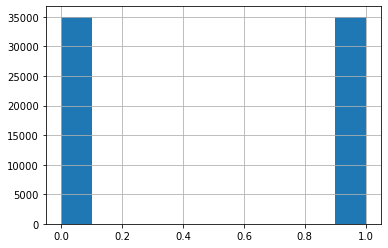

In [77]:
df['cardio'].hist() #Number of cardio patients

<AxesSubplot:ylabel='Density'>

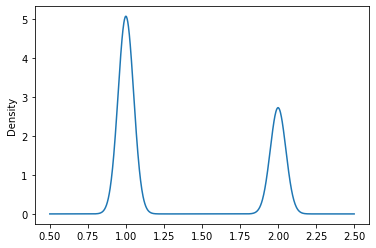

In [78]:
df.gender.plot.kde() #gender

<AxesSubplot:ylabel='smoke'>

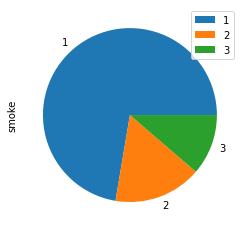

In [79]:
df.groupby(['cholesterol']).sum().plot(kind='pie',y='smoke') #Comparison between cholesterol patients and smokers

In [80]:
df.groupby('smoke')['gender'].agg(np.mean)

smoke
0    1.299447
1    1.868212
Name: gender, dtype: float64

In [81]:
round(df.groupby('age')['gender'].agg(np.mean))

age
29    1.0
30    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
57    1.0
58    1.0
59    1.0
60    1.0
61    1.0
62    1.0
63    1.0
64    1.0
Name: gender, dtype: float64

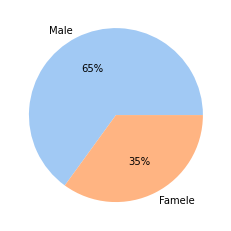

In [82]:
data = [65, 35]
labels = ['Male', 'Famele']


colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

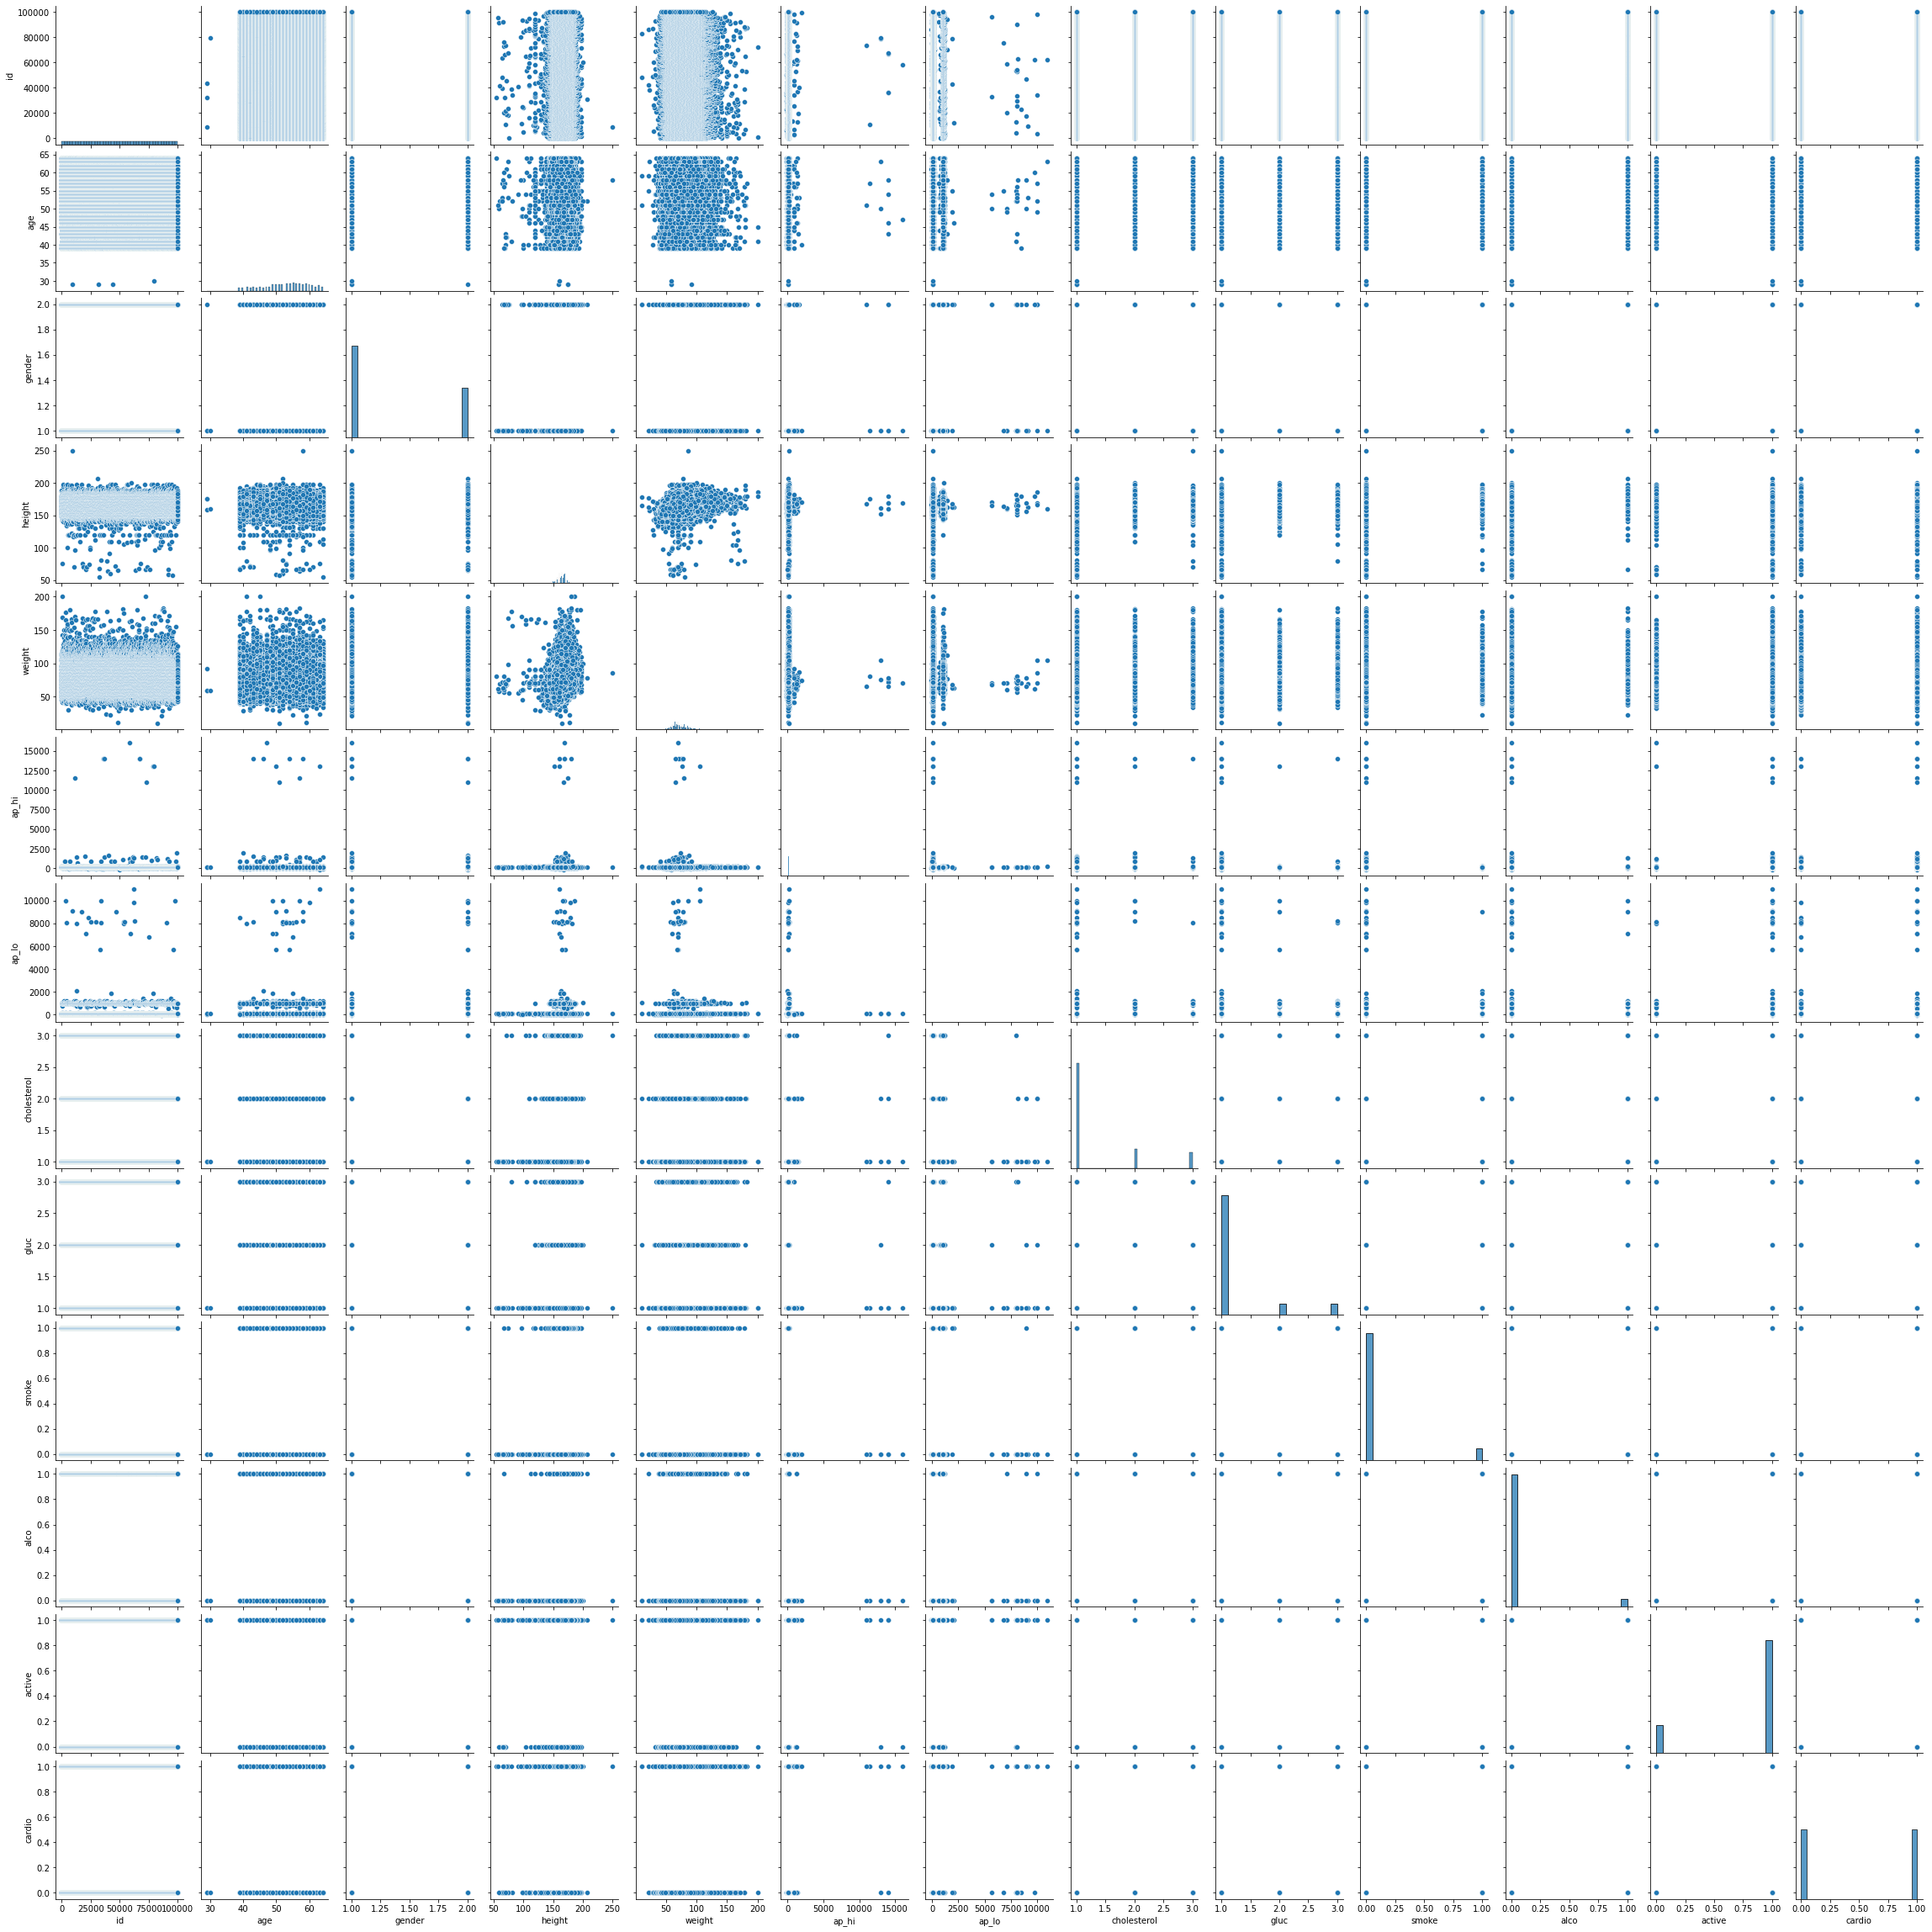

In [83]:
sns.pairplot(df)

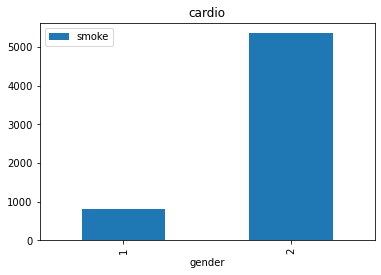

In [84]:

df.groupby(['gender']).sum().plot(kind='bar',y='smoke') 


plt.title('cardio'); 

In [85]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


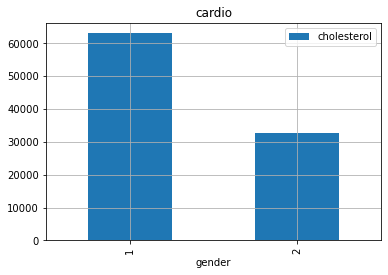

In [86]:
df.groupby(['gender']).sum().plot(kind='bar',y='cholesterol') 


plt.title('cardio'); 
plt.grid()